1. **Load `sp500.csv`** pada folder data, dan set kolom `date` sebagai Index. Lalu tampilkan 10 data pertama

In [15]:
### jawaban anda disini
import pandas as pd
import numpy as np

sp500 = pd.read_csv('data/sp500.csv', index_col=0,
                parse_dates=True)
sp500.head(10)

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44
2007-07-09,1531.85
2007-07-10,1510.12
2007-07-11,1518.76
2007-07-12,1547.70


2. Tampilkan kondisi bulanan menggunakan boxplot dan uraikan insight apa yang didapat

In [16]:
### jawaban anda disini
sp500['Month'] = sp500.index.month
sp500.head()

,SP500,Month
date,,
2007-06-29,1503.35,6
2007-07-02,1519.43,7
2007-07-03,1524.87,7
2007-07-05,1525.40,7
2007-07-06,1530.44,7


Text(0.5, 0, 'Month')

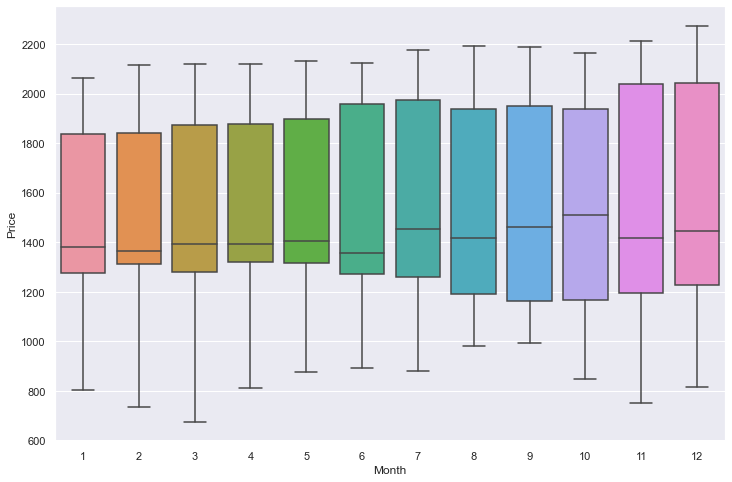

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=sp500, x='Month', y='SP500')
plt.ylabel('Price')
plt.xlabel('Month')

In [17]:
sp500_1 = sp500.groupby('Month').agg(['median','min','max'])
sp500_1

SP500                 
         median     min      max
Month                           
1      1380.950  805.22  2063.15
2      1365.710  735.09  2115.48
3      1394.280  676.53  2117.39
4      1390.940  811.08  2117.69
5      1404.700  877.52  2130.82
6      1356.835  893.04  2124.20
7      1455.270  879.13  2175.03
8      1416.820  979.73  2190.15
9      1461.050  994.75  2186.48
10     1510.365  848.92  2163.66
11     1417.260  752.44  2213.35
12     1445.900  816.21  2271.72

### Insight

* Dapat dilihat bahwa harga `SP500` pada tiap bulannya mengalami peningkatan
* Harga `SP500` mengalami penurunan pada bulan ke-8
* Median terendah didapatkan pada bulan ke-6 dengan harga 1356.835 dan median tertinggi didapatkan pada bulan ke-10 dengan harga 1510.365
* Nilai minimum terendah didapatkan pada bulan ke-3 dengan harga 676.53 dan tertinggi pada bulan ke-9 dengan harga 994.75
* Nilai maksimum terendah didapatkan pada bulan ke-1 dengan harga 2063.15 dan tertinggi pada bulan ke-12 dengan harga 2271.72
* Harga `SP500` pada bulan ke-12 mengalami kenaikan dapat disebabkan oleh adanya *Santa Claus Rally*
* Harga `SP500` pada bulan ke-10 mengalami sedikit penurunan dapat disebabkan oleh adanya *October Effect*

3. Dari data sp500 tadi, lakukanlah _downsampling_ untuk data per minggu dengan fungsi agregasi mean.

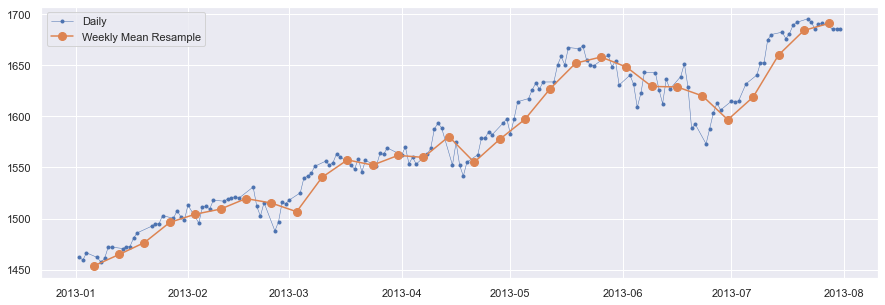

In [18]:
import matplotlib.pyplot as plt

### jawaban anda disini
sp500_weekly = sp500.resample('W').mean()

# Plot daily and weekly resampled time series together
start, end = '2013-01', '2013-07'
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(sp500.loc[start:end, 'SP500'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sp500_weekly.loc[start:end, 'SP500'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.legend();

4. Lakukan upsampling untuk memenuhi nilai pada hari weekend dan index shifting sehingga data berakhir tepat di akhir tahun (31 Desember 2013). Catatan: Permintaan untuk melaksanakan index shifting semata-mata hanya untuk menguji kemampuan peserta dalam memahami kode dan tujuan dari index shifting, tidak ada interpretasi apapun dari proses *shifting*-nya 

<ipython-input-19-e110c6582275>:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  foo.tshift(153).plot()


<AxesSubplot:xlabel='date'>

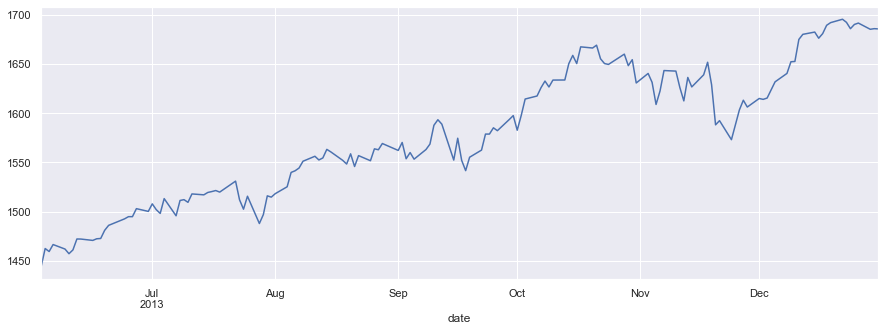

In [19]:
### jawaban anda disini
foo = sp500.resample('D').interpolate()
start, end = '2013-01', '2013-07'
foo = foo.loc[start:end, 'SP500']
plt.figure(figsize=(15,5))

### jawaban anda disini
foo.tshift(153).plot()

5.Lakukanlah _centered rolling window mean_ untuk 7 dan 30 hari pada data `sp500`.

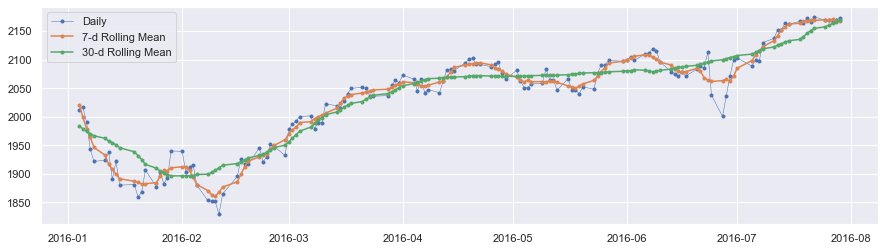

In [20]:
### jawaban anda disini
sp500_7d = sp500.rolling(window=7, center=True).mean()
sp500_30d = sp500.rolling(window=30, center=True).mean()

# Start and end of the date range to extract
start, end = '2016-01', '2016-07'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(sp500.loc[start:end, 'SP500'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sp500_7d.loc[start:end, 'SP500'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.plot(sp500_30d.loc[start:end, 'SP500'],
marker='.', linestyle='-', label='30-d Rolling Mean')
ax.legend();

6. **Load `payment.csv`**  menjadi Pandas dataframe dan tampilkan 10 data pertama. Kemudian, lakukan filter untuk menyisakan `courier` "10", lalu buat kolom `cost_per_weight` dan tampilkan median `cost_per_weight` dengan grouping terhadap kolom `refunded` seperti contoh di bawah. Kerjakan dengan menggunakan teknik chaining!

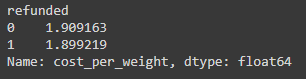

In [32]:
# Load data

def load_data():
    df = pd.read_csv('data/payment.csv')
    return df

df = (load_data()[lambda x: x['courier']==10])
df

,gmv,courier_cost,payment_method,platform,courier,from_city,weight,refunded
1,0.313480,0.607338,3.0,2.0,10.0,133.0,0.198982,0
2,0.313480,0.607338,2.0,2.0,10.0,133.0,0.188232,0
3,0.512386,0.656176,3.0,2.0,10.0,48.0,0.367522,0
8,0.459789,0.607338,3.0,2.0,10.0,134.0,0.276451,0
12,0.497769,0.629957,3.0,2.0,10.0,387.0,0.361175,0
...,...,...,...,...,...,...,...,...
9992,0.650535,0.651322,2.0,2.0,10.0,131.0,0.325784,0
9995,0.406961,0.705401,3.0,2.0,10.0,132.0,0.270736,0
9996,0.487008,0.715088,3.0,2.0,10.0,135.0,0.367522,0
9997,0.453017,0.640128,17.0,2.0,10.0,74.0,0.411080,0


In [31]:
# Jawab di sini
result = (df.assign(cost_per_weight=lambda x: x['courier_cost']/x['weight'])
.groupby('refunded')['cost_per_weight'].median())
result

refunded
0    1.909163
1    1.899219
Name: cost_per_weight, dtype: float64